In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from params import subject_keys, eeg_chans, run_keys
from compute_power_at_resp import power_at_resp_job
from bibliotheque import get_pos, init_nan_da, df_baseline
import mne
import os
from configuration import base_folder

In [2]:
concat = []
for run_key in run_keys:
    participant, session = run_key.split('_')
    power_at_resp_participant = power_at_resp_job.get(run_key).to_dataframe()
    concat.append(power_at_resp_participant)
power_at_resp = pd.concat(concat).reset_index(drop = True)

power_at_resp is processing ('P13_baseline',)
power_at_resp is processing ('P13_music',)
power_at_resp is processing ('P13_odor',)
power_at_resp is processing ('P14_baseline',)
power_at_resp is processing ('P14_music',)
power_at_resp is processing ('P14_odor',)
power_at_resp is processing ('P15_baseline',)
power_at_resp is processing ('P15_music',)
power_at_resp is processing ('P15_odor',)
power_at_resp is processing ('P16_baseline',)
power_at_resp is processing ('P16_music',)
power_at_resp is processing ('P16_odor',)
power_at_resp is processing ('P17_baseline',)
power_at_resp is processing ('P17_music',)
power_at_resp is processing ('P17_odor',)
power_at_resp is processing ('P18_baseline',)
power_at_resp is processing ('P18_music',)
power_at_resp is processing ('P18_odor',)
power_at_resp is processing ('P21_baseline',)
power_at_resp is processing ('P21_music',)
power_at_resp is processing ('P21_odor',)


/tmp/ipykernel_3961673/3805491644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(power_at_resp.corr(), cmap = 'seismic', vmin = -1 , vmax = 1 , annot = True)


<AxesSubplot: >

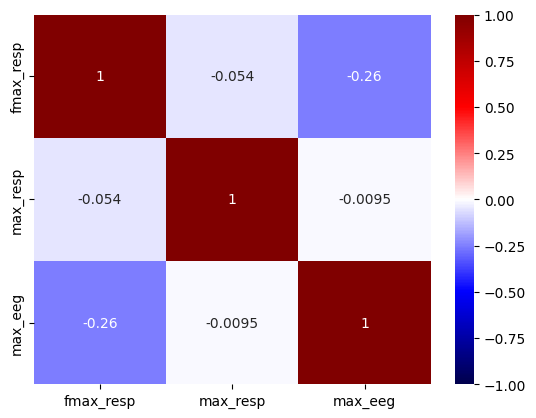

In [3]:
sns.heatmap(power_at_resp.corr(), cmap = 'seismic', vmin = -1 , vmax = 1 , annot = True)

In [4]:
power_at_resp

session chan participant  fmax_resp     max_resp       max_eeg
0     baseline  Fp1         P01       0.36   620.517872  1.169588e-12
1     baseline   Fz         P01       0.36   620.517872  2.607854e-13
2     baseline   F3         P01       0.36   620.517872  1.148734e-12
3     baseline   F7         P01       0.36   620.517872  4.263217e-12
4     baseline  FT9         P01       0.36   620.517872  5.405662e-12
...        ...  ...         ...        ...          ...           ...
1762      odor  FC6         P21       0.28  2461.373861  1.189186e-12
1763      odor  FC2         P21       0.28  2461.373861  9.502660e-13
1764      odor   F4         P21       0.28  2461.373861  1.247584e-12
1765      odor   F8         P21       0.28  2461.373861  2.409920e-12
1766      odor  Fp2         P21       0.28  2461.373861  1.801255e-12

[1767 rows x 6 columns]

In [5]:
power_at_resp['log_max_eeg'] = np.log(power_at_resp['max_eeg'].values)

In [6]:
indexes = ['participant','session','chan']
metrics = ['fmax_resp','max_resp','max_eeg','log_max_eeg']

In [7]:
power_at_resp_baselined = df_baseline(df = power_at_resp, indexes = indexes, metrics= metrics, mode = 'substract')

In [8]:
power_at_resp_baselined

participant session chan  fmax_resp    max_resp       max_eeg  \
0            P01    odor  Fp1       0.00 -374.957554 -1.296162e-13   
1            P01    odor   Fz       0.00 -374.957554  1.509711e-13   
2            P01    odor   F3       0.00 -374.957554 -5.721781e-13   
3            P01    odor   F7       0.00 -374.957554 -2.490259e-12   
4            P01    odor  FT9       0.00 -374.957554 -8.162423e-13   
...          ...     ...  ...        ...         ...           ...   
1173         P21   music  FC6       0.02   98.649212 -1.025062e-12   
1174         P21   music  FC2       0.02   98.649212  1.204225e-13   
1175         P21   music   F4       0.02   98.649212  2.668659e-12   
1176         P21   music   F8       0.02   98.649212 -1.064612e-12   
1177         P21   music  Fp2       0.02   98.649212  1.695680e-10   

      log_max_eeg  
0       -0.117458  
1        0.456734  
2       -0.689344  
3       -0.877375  
4       -0.163693  
...           ...  
1173    -0.552562  
1174     0.159272  
1175     1.051938  
1176    -0.279164  
1177     4.823396  

[1178 rows x 7 columns]

<AxesSubplot: xlabel='chan', ylabel='log_max_eeg'>

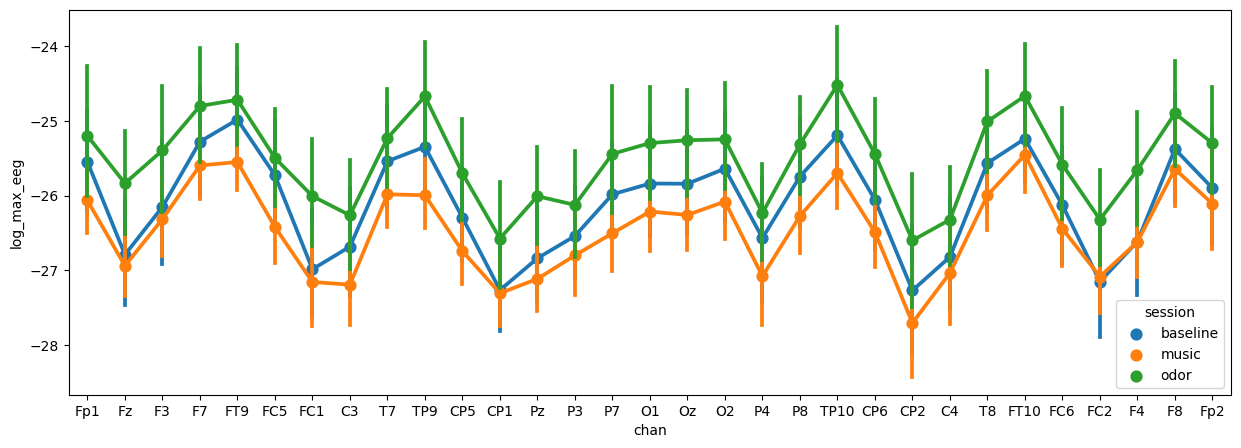

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
sns.pointplot(data = power_at_resp, x = 'chan', y = 'log_max_eeg', hue = 'session',ax=ax)

<AxesSubplot: xlabel='chan', ylabel='log_max_eeg'>

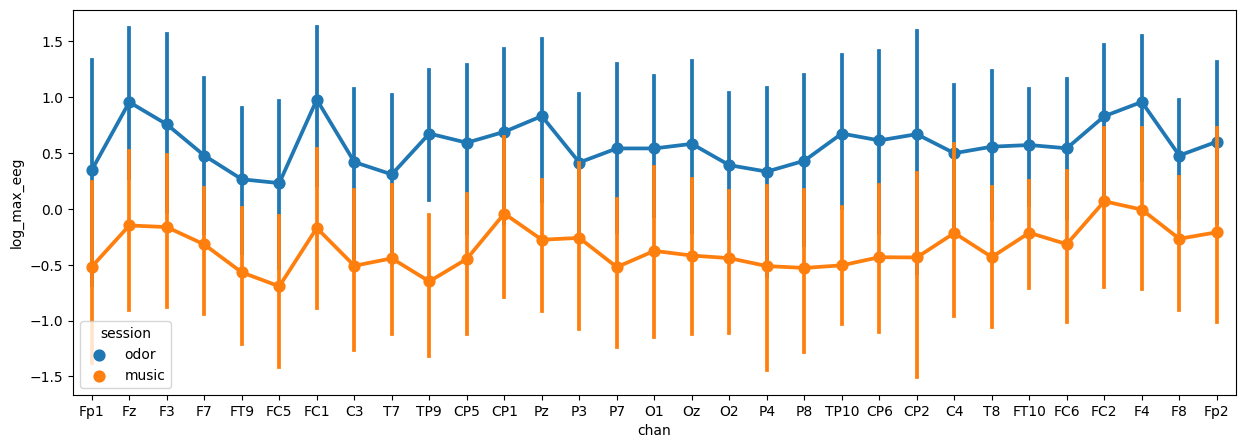

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
sns.pointplot(data = power_at_resp_baselined, x = 'chan', y = 'log_max_eeg', hue = 'session',ax=ax)

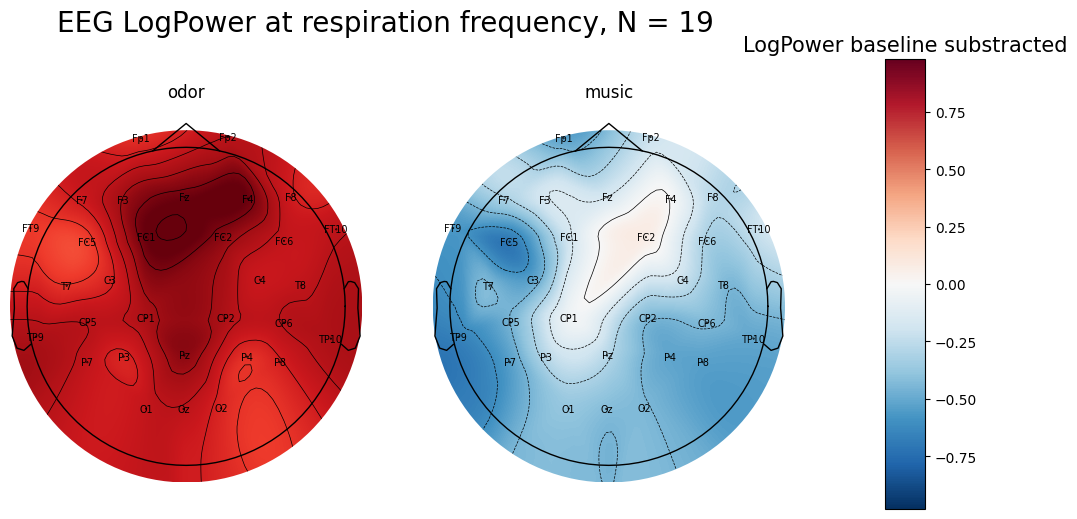

In [11]:
delta_quantile = 0.

colname = 'log_max_eeg'

df = power_at_resp_baselined

N = power_at_resp_baselined['participant'].unique().size

vmin = np.quantile(df.groupby(['session','chan']).mean(numeric_only = True)[colname].values, delta_quantile)
vmax = np.quantile(df.groupby(['session','chan']).mean(numeric_only = True)[colname].values, 1 - delta_quantile)

vmin = vmin if abs(vmin) > abs(vmax) else -vmax
vmax = vmax if abs(vmin) < abs(vmax) else abs(vmin)
    
pos = get_pos()

fig, axs = plt.subplots(ncols = df['session'].unique().size, figsize = (10,5))
fig.suptitle(f'EEG LogPower at respiration frequency, N = {N}', fontsize = 20, y = 1.1)

for c, session in enumerate(df['session'].unique()):
    ax = axs[c]
    topo_data = df[df['session'] == session].groupby('chan').mean(numeric_only = True)[colname].reindex(eeg_chans)
    im, cn = mne.viz.plot_topomap(data =topo_data.values , pos = pos, names = eeg_chans, axes = ax, show = False, vlim = (vmin,vmax))
    ax.set_title(f'{session}')

ax_x_start = 1
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('LogPower baseline substracted',fontsize=15)

file = base_folder / 'Figures' / 'power_at_resp' / 'log_substracted_to_baseline.png'

if not os.path.isfile(file):
    print('SAVE')
    fig.savefig(file, bbox_inches = 'tight')

SAVE
SAVE
SAVE
SAVE
SAVE
SAVE
SAVE
SAVE


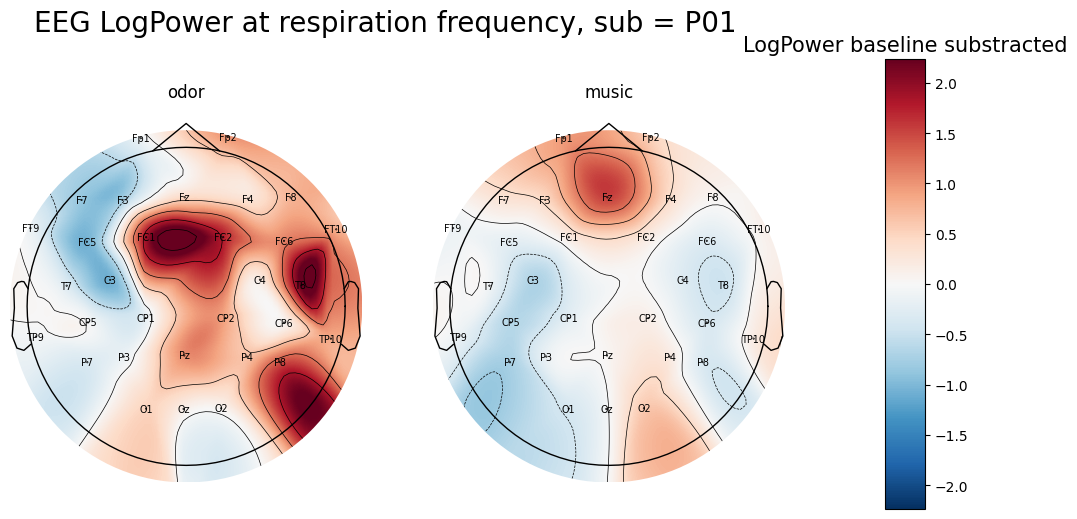

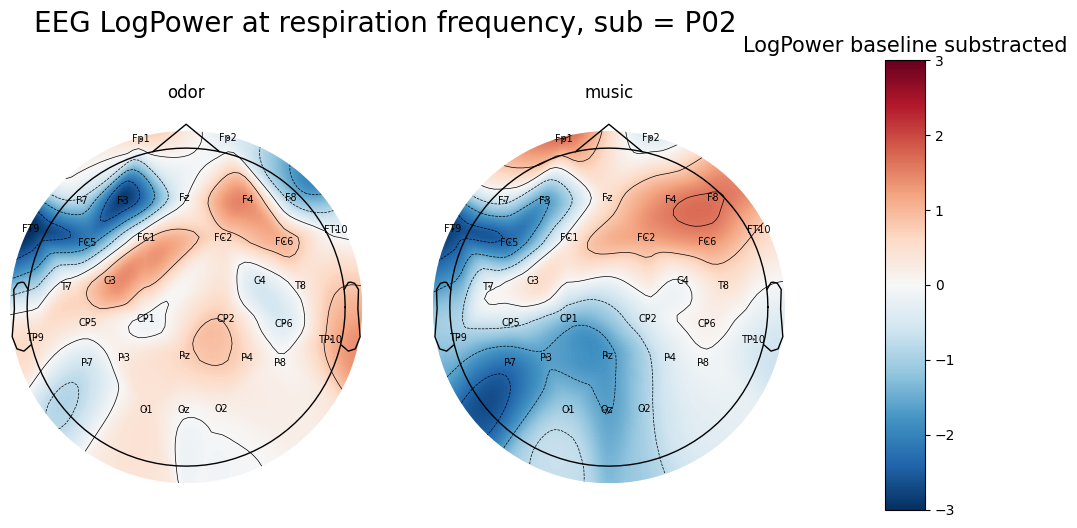

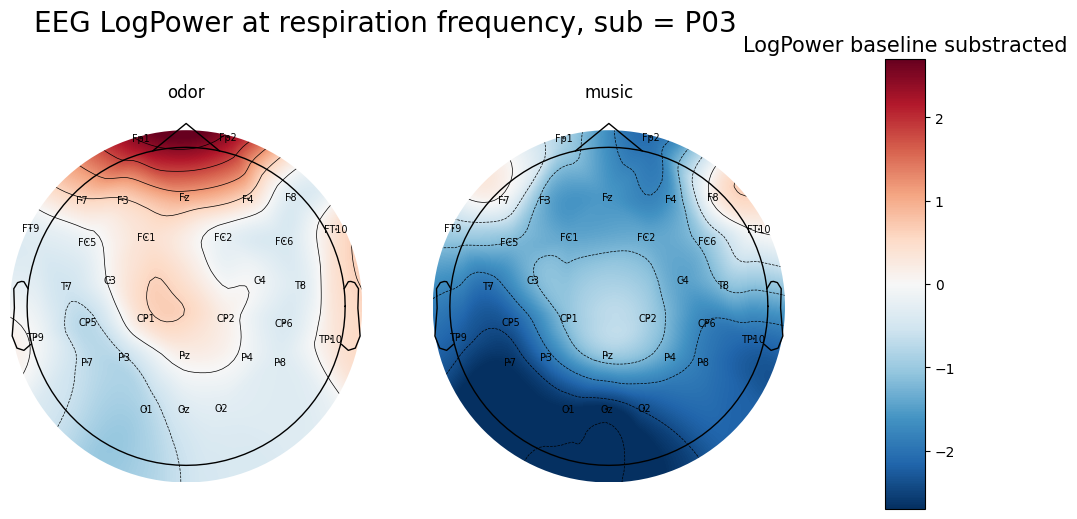

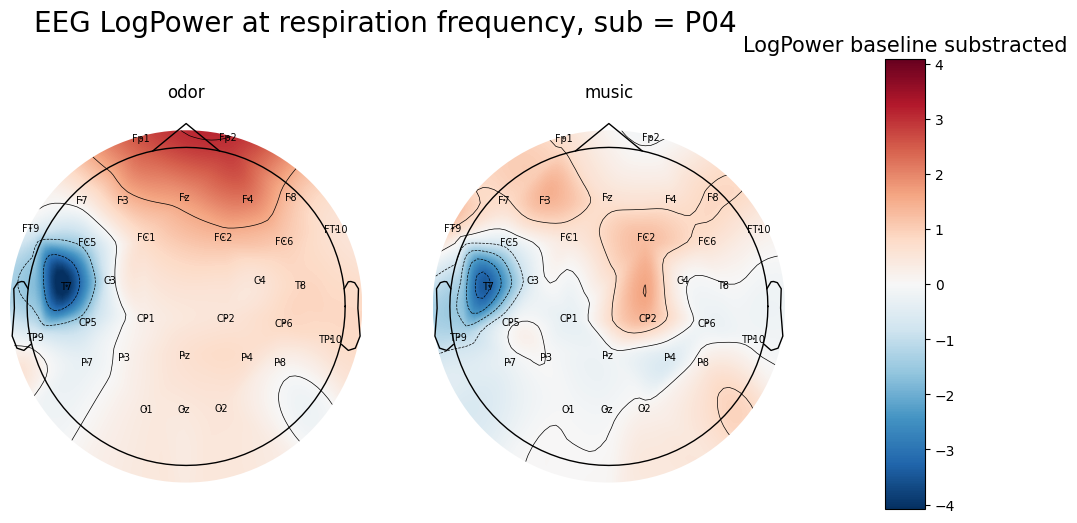

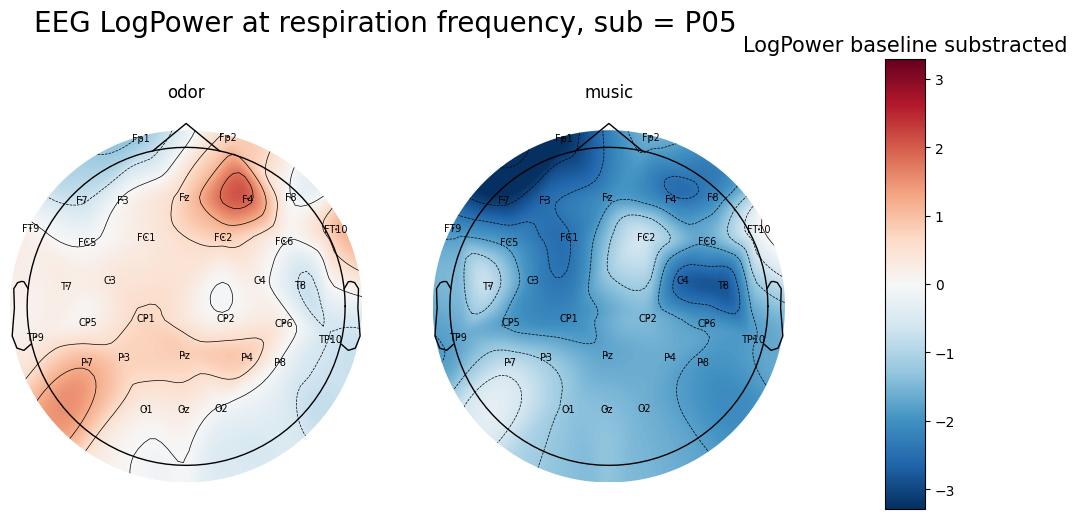

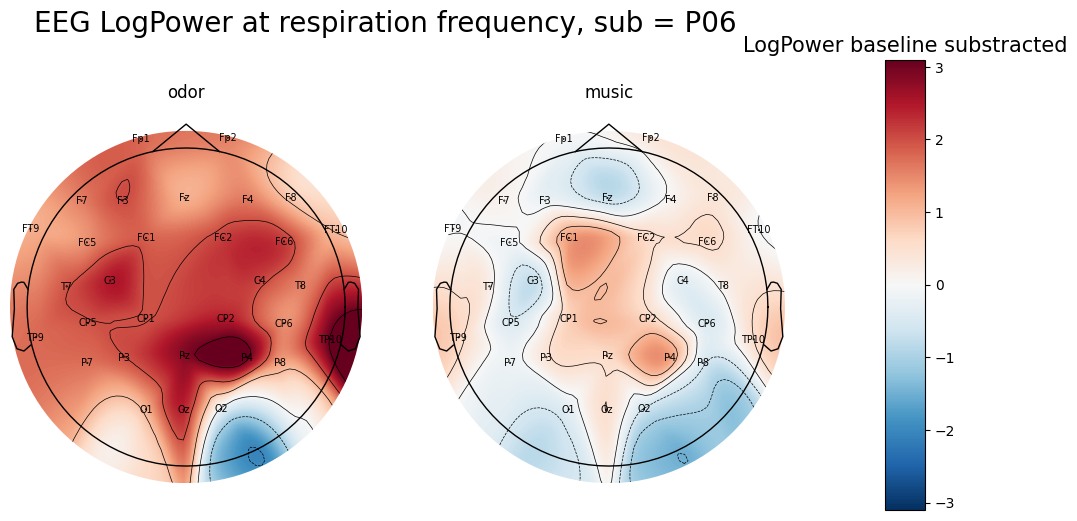

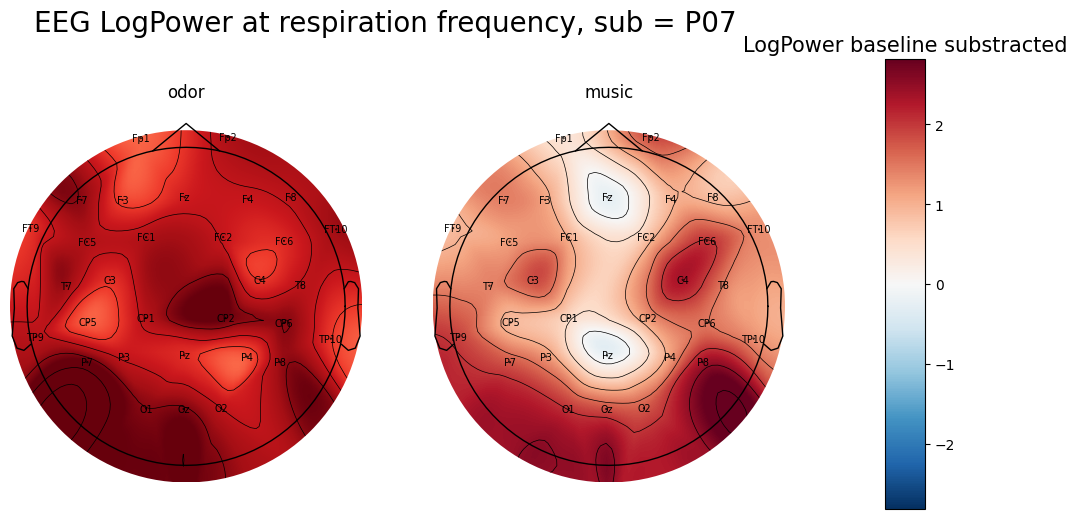

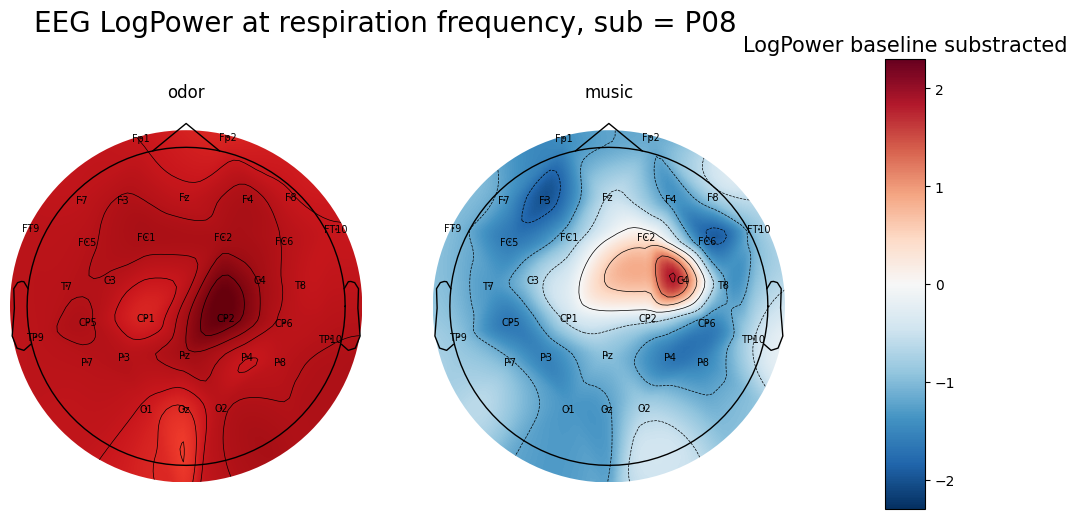

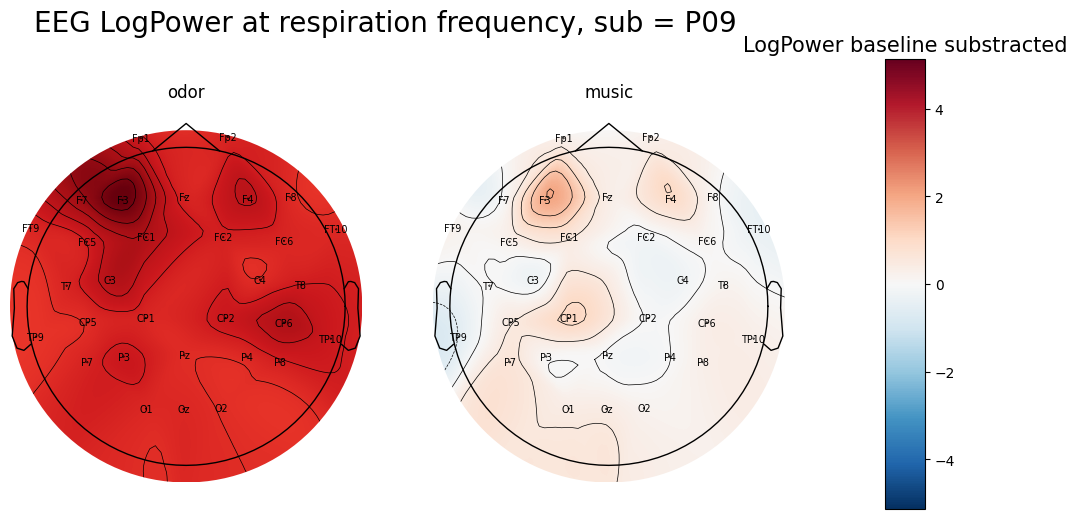

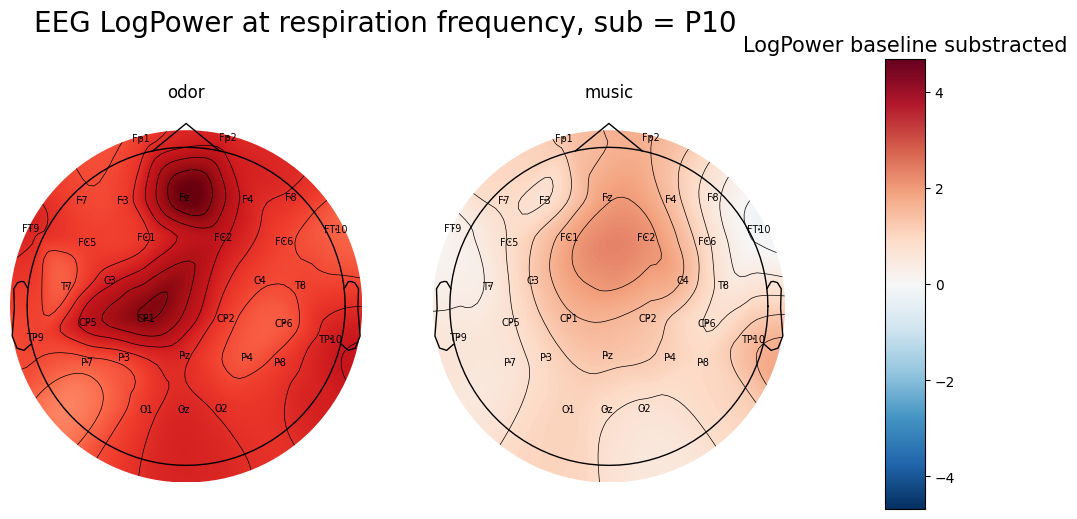

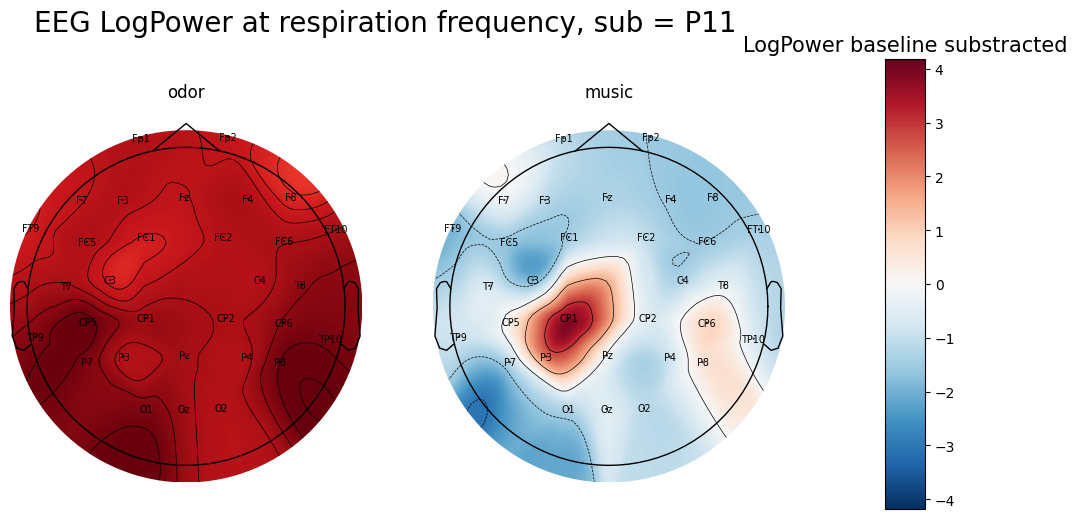

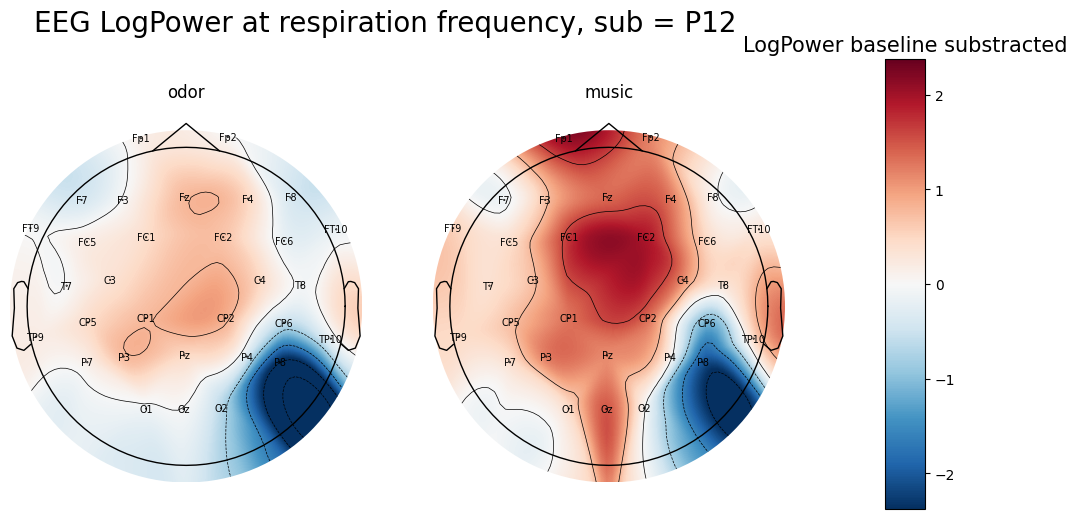

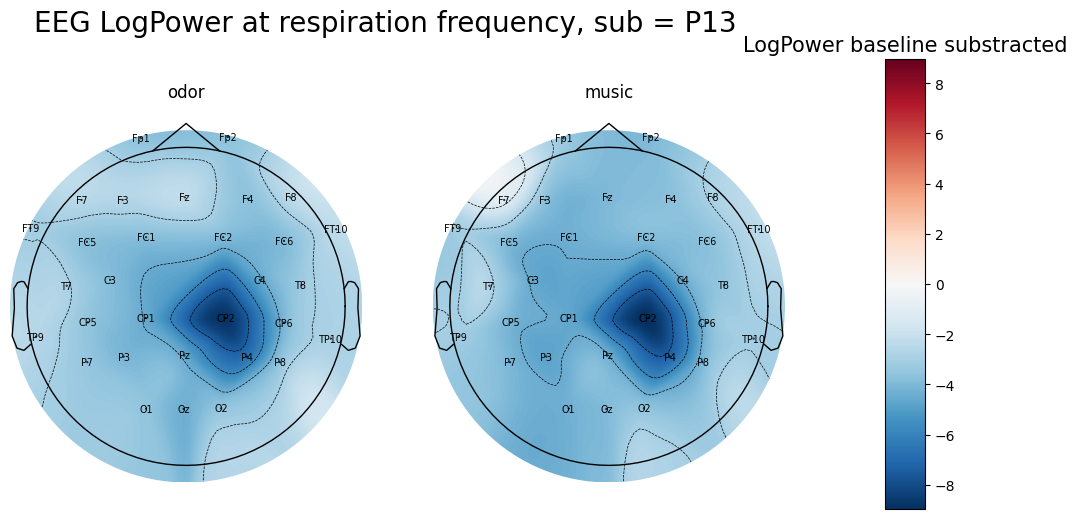

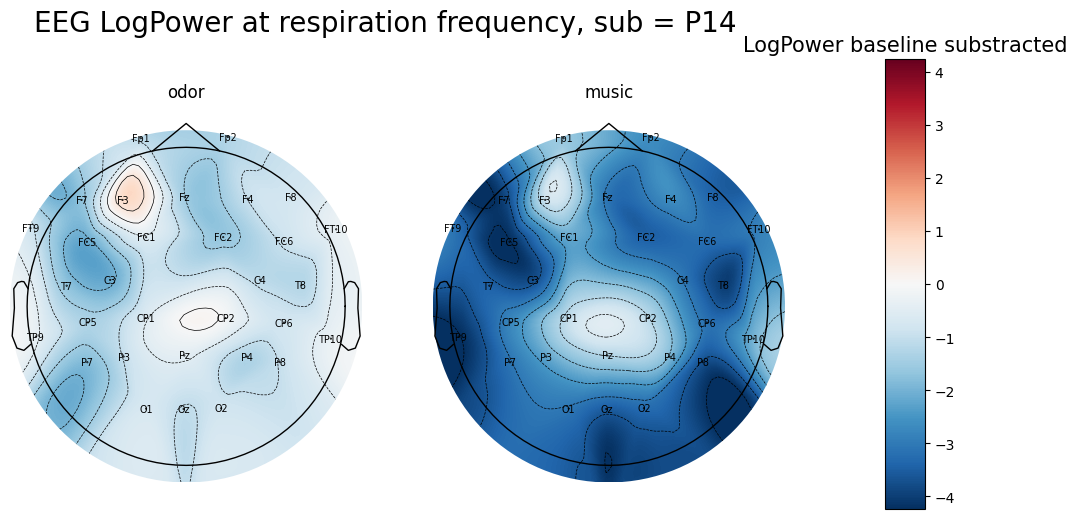

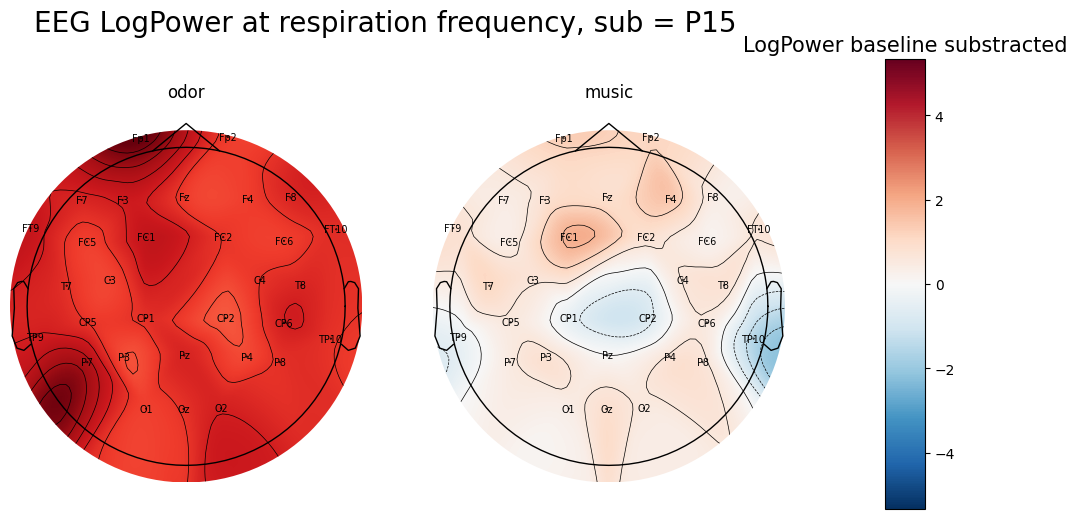

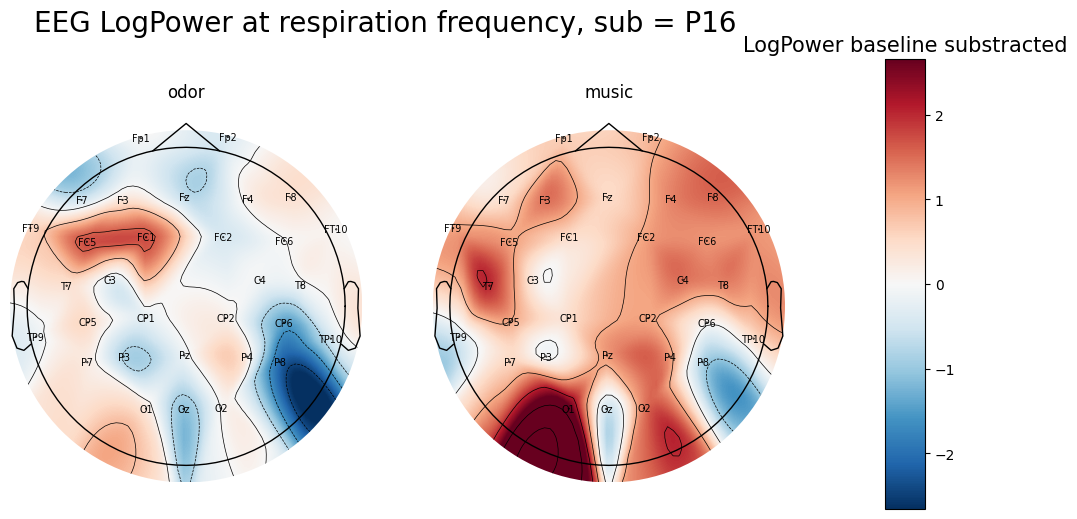

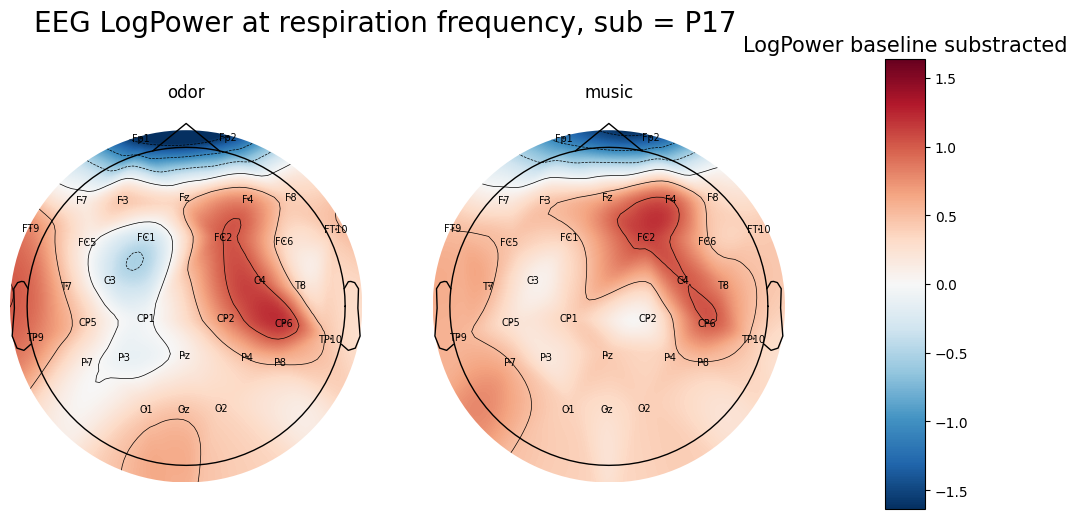

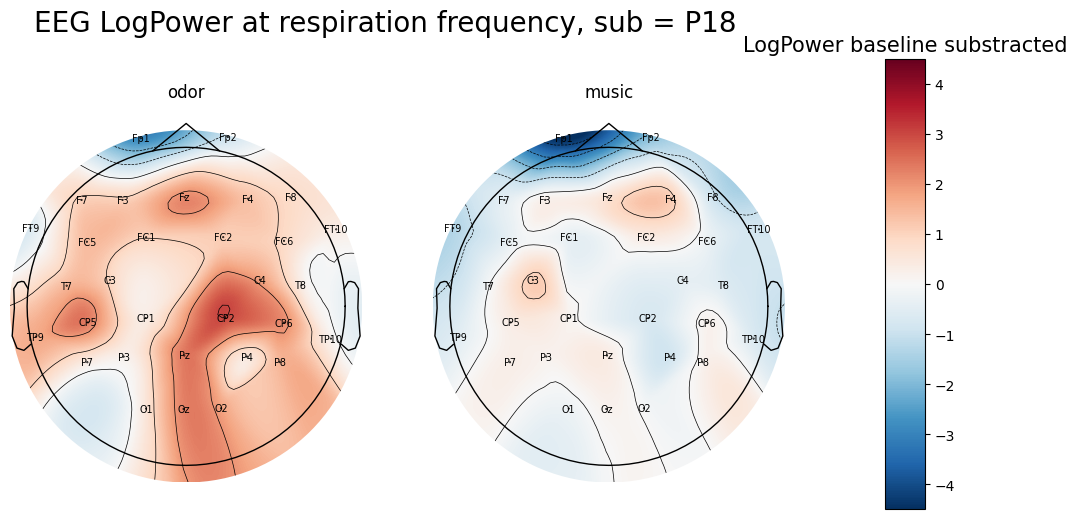

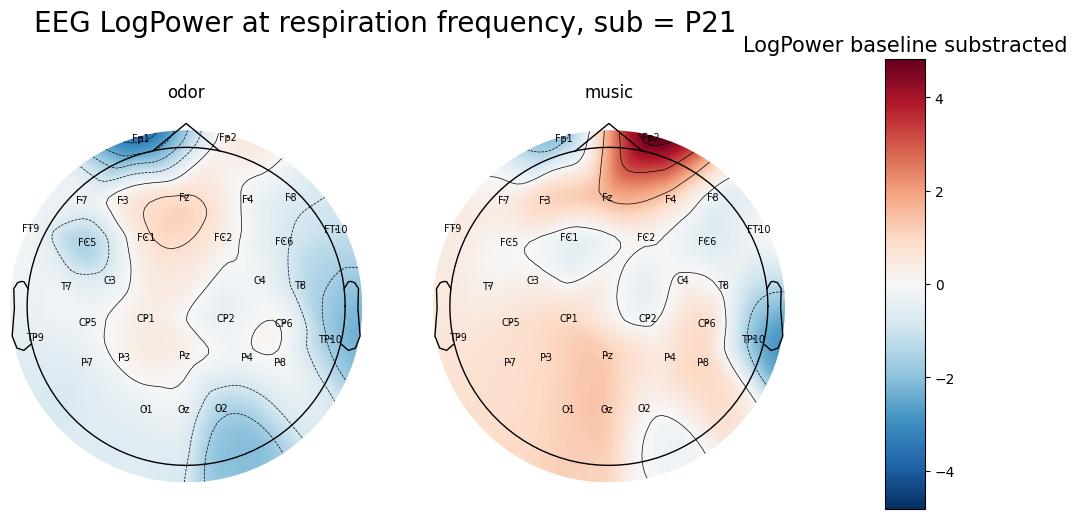

In [12]:
delta_quantile = 0.

colname = 'log_max_eeg'

for subject in subject_keys:
    
    df = power_at_resp_baselined[power_at_resp_baselined['participant'] == subject]
    
    vmin = np.quantile(df.groupby(['session','chan']).mean(numeric_only = True)[colname].values, delta_quantile)
    vmax = np.quantile(df.groupby(['session','chan']).mean(numeric_only = True)[colname].values, 1 - delta_quantile)
    
    vmin = vmin if abs(vmin) > abs(vmax) else -vmax
    vmax = vmax if abs(vmin) < abs(vmax) else abs(vmin)

    pos = get_pos()

    fig, axs = plt.subplots(ncols = df['session'].unique().size, figsize = (10,5))
    fig.suptitle(f'EEG LogPower at respiration frequency, sub = {subject}', fontsize = 20, y = 1.1)

    for c, session in enumerate(df['session'].unique()):
        ax = axs[c]
        topo_data = df[df['session'] == session].groupby('chan').mean(numeric_only = True)[colname].reindex(eeg_chans)
        im, cn = mne.viz.plot_topomap(data =topo_data.values , pos = pos, names = eeg_chans, axes = ax, show = False, vlim = (vmin,vmax))
        ax.set_title(f'{session}')

    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0.1
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('LogPower baseline substracted',fontsize=15)

    file = base_folder / 'Figures' / 'power_at_resp' / 'by_subject' / f'{subject}.png'

    if not os.path.isfile(file):
        print('SAVE')
        fig.savefig(file, bbox_inches = 'tight')